# Kickstarter Projects: Success or Bust?

Kickstarter is an online platform where users can help bring “creative projects to life” by donating to projects as they wish. As of 2019, there have been 445,000 projects in categories ranging from music, video games, stage shows and technology. Kickstarter allows unique projects and personal dreams to come into fruition. However, many projects do not get completed and donors can feel like they wasted their money. 


**Objective:** Utilize past data to predict whether a Kickstarter project will meet its initial donation goal.

1. Data Cleaning
    * Null values
    * Erroneous Values
2. Exploratory Data Analysis
    * Visualizing dataset
    * Correlations    
3. Data Preprocessing
    * Scale numerical features
    * One-hot encode categorical features
    * train_test_split dataset    
4. **Modeling**
    * **Decision Tree/Random Forest Classifiers**
    * **Gradient Boosting Classifier**
    * **K-Nearest Neighbors Classifier**
    * **Hyperparameter Tuning**

This project uses the dataset from the Kaggle dataset "Kickstarter Projects" found [here.](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv)

### Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree, metrics

In [2]:
X_train = pd.read_csv('data/train_test/X_train.csv',index_col = 0)
X_test = pd.read_csv('data/train_test/X_test.csv', index_col = 0)
y_train = pd.read_csv('data/train_test/y_train.csv', index_col = 0)
y_test = pd.read_csv('data/train_test/y_test.csv', index_col = 0)

In [3]:
display(X_train.head(), y_train.head())

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline,main_category_Art,main_category_Comics,main_category_Crafts,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
267583,-1.423389,0.379816,0.365343,0.496911,0.382354,-1.440397,-0.241498,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30421,-1.225194,0.408290,0.009492,0.524899,0.410896,-1.239136,-0.154425,0,0,0,...,0,0,0,0,0,0,0,0,0,1
312140,-0.235538,0.831170,0.665675,0.940554,0.834773,-0.234173,0.584453,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49853,1.400252,0.027494,-0.172813,0.069640,0.029201,1.426918,0.886965,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89312,0.582313,0.363468,0.009492,0.480842,0.365968,0.596328,1.538770,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,state
267583,1
30421,1
312140,1
49853,0
89312,0


### 0. Naive Classifier

Baseline score using Naive Classifier (all predictions are 1)
Accuracy: 0.3579
Balanced Accuracy: 0.5000
Precision score for yes: 0.3579
Recall score for yes: 1.0000


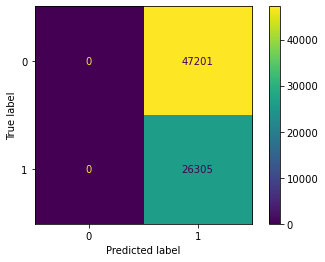

In [4]:
naive = [1]*len(y_test)
naive_cm = metrics.confusion_matrix(y_test, naive)

acc = metrics.accuracy_score(y_test, naive)
bal_acc = metrics.balanced_accuracy_score(y_test, naive)
precision = metrics.precision_score(y_test, naive, pos_label = 1)
recall = metrics.recall_score(y_test, naive, pos_label = 1)

print('Baseline score using Naive Classifier (all predictions are 1)')
print(f'Accuracy: {acc:.4f}')
print(f'Balanced Accuracy: {bal_acc:.4f}')
print(f'Precision score for yes: {precision:.4f}')
print(f'Recall score for yes: {recall:.4f}')

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = naive_cm)
disp.plot()
plt.show()

A naive classifier was used to understand the baseline prediction accuracy if the model erroneously predicted all cases to be 1. This classifier should have a low accuracy score as not all or even most cases are of class 1. This is useful for understanding that a 99% accuracy does not necessarily translate to a great model. For example, if 99% of the cases in a dataset were class 1, naively predicting all cases to be 1 would provide an accurcay score of 99%, but failed to correctly predict the relevant 1% of cases. With this naive classifier, we can compare just how much of an improvement the next classifiers provide.

### 1. Decision Tree Classifier

In [5]:
baseline = tree.DecisionTreeClassifier(criterion = 'entropy')
baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_test)

In [6]:
def score_model(model, prediction):
    acc = metrics.accuracy_score(y_test, prediction)
    bal_acc = metrics.balanced_accuracy_score(y_test, prediction)
    precision = metrics.precision_score(y_test, prediction, pos_label = 1)
    recall = metrics.recall_score(y_test, prediction, pos_label = 1)
    
    print(f'Accuracy: {acc:.4f}')
    print(f'Balanced Accuracy: {bal_acc:.4f}')
    print(f'Precision score for yes: {precision:.4f}')
    print(f'Recall score for yes: {recall:.4f}')
    
    class_labels = model.classes_.astype(str)
    
    print(metrics.classification_report(y_test, prediction))
    
    metrics.plot_confusion_matrix(model, X_test, y_test, display_labels = class_labels)
    plt.show()
    
    return

Baseline Decision Tree Model
Accuracy: 0.9948
Balanced Accuracy: 0.9941
Precision score for yes: 0.9934
Recall score for yes: 0.9919
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47201
           1       0.99      0.99      0.99     26305

    accuracy                           0.99     73506
   macro avg       0.99      0.99      0.99     73506
weighted avg       0.99      0.99      0.99     73506



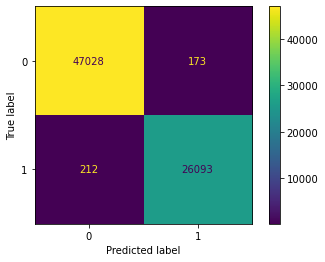

In [7]:
print("Baseline Decision Tree Model")
score_model(baseline, baseline_pred)

From the baseline Decision Tree model, we are able to accurately predict whether Kickstarter projects will reach their goal or not. For this specific project, it would be wise to minimize the amount of false positive errors as it would lead to users feeling like they've been lied to if they donate to a project that is predicted to meet their goal but end up not actually doing so. By looking at the precision ($\frac{True Positive}{True Positive + FalsPositive}$), we can see whether or not we are minimizing our false positive classifications. For this Decision Tree model, the precision was 0.9934 which is very impressive. However, with such good results, it seems like this could be too good to be true. To make sure, I will try hyperparameter tuning and other models to further optimize the model.

In [8]:
baseline.get_depth()

33

### 1a. Hyperparameter Tuning for Decision Tree

In [9]:
from sklearn.model_selection import RandomizedSearchCV

def tune_model(model, param_grid):
    model_randomsearch = RandomizedSearchCV(model, param_grid, cv = 5)
    
    model_randomsearch.fit(X_train, y_train.values.ravel())
    
    print(f'Optimal hyperparameters: {model_randomsearch.best_params_}')
    
    tuned_pred = model_randomsearch.predict(X_test)
    
    return model_randomsearch, tuned_pred

In [10]:
params = {'max_depth': [10,20,30,40, None],
          'criterion': ['gini', 'entropy'],
          'max_features': np.arange(1,10)}

clf = tree.DecisionTreeClassifier()

tree_cv, tree_cv_pred = tune_model(clf, params)

Optimal hyperparameters: {'max_features': 8, 'max_depth': 20, 'criterion': 'gini'}


Hyperparameter Tuned Decision Tree Model
Accuracy: 0.9915
Balanced Accuracy: 0.9911
Precision score for yes: 0.9868
Recall score for yes: 0.9895
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     47201
           1       0.99      0.99      0.99     26305

    accuracy                           0.99     73506
   macro avg       0.99      0.99      0.99     73506
weighted avg       0.99      0.99      0.99     73506



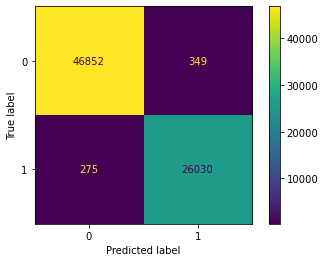

In [11]:
print('Hyperparameter Tuned Decision Tree Model')
score_model(tree_cv, tree_cv_pred)

Surprisingly. using `RandomizedSearchCV` performed slightly worse than the baseline model. The results are still outstanding for a classifier, scoring slightly under 0.99 for precision and recall, respectively. However, these results could probably be improved with a more robust model such as the Random Forest classifier.

### 2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

base_forest = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
base_forest.fit(X_train, y_train.values.ravel())

base_forest_pred = base_forest.predict(X_test)

Base Random Forest Model
Accuracy: 0.9962
Balanced Accuracy: 0.9969
Precision score for yes: 0.9899
Recall score for yes: 0.9995
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     47201
           1       0.99      1.00      0.99     26305

    accuracy                           1.00     73506
   macro avg       0.99      1.00      1.00     73506
weighted avg       1.00      1.00      1.00     73506



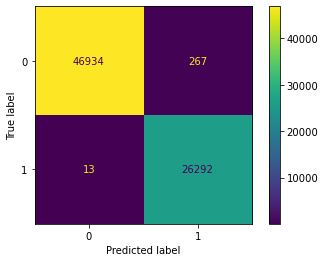

In [13]:
print('Base Random Forest Model')
score_model(base_forest, base_forest_pred)

Overall, the baseline Random Forest model performed significantly better than the past two decision tree models which was expected, as a Random Forest is an ensemble of multiple Decision Trees working simultaneously. However, the precision score has decreased from the baseline Decision Tree model meaning there will be more false positives predicted with this model. Because this model is already performing extremely well, this model will stay as is without hyperparameter tuning.

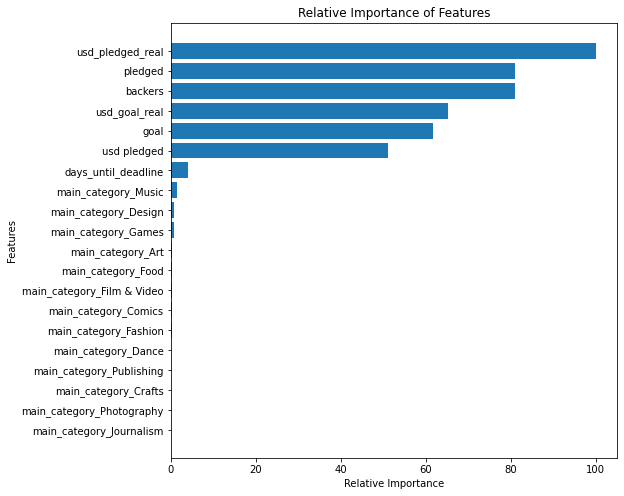

In [14]:
feature_importance = base_forest.feature_importances_
feature_importance = 100*(feature_importance / max(feature_importance))[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (8,8))
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.title('Relative Importance of Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

From the graph above, it can be seen that the most important feature in terms of predicting whether the project's goal will be met is `usd_pledged_real` and `pledged`. This makes sense as more dollars are pledged to the Kickstarter project, the more likely it is that the initial donation goal is met. After the 7th most important feature, the features are the one hot encoded main category features with almost 0 relative importance. This means that the main category of a Kickstarter project has minimal impact on how this model made its predictions. 

### 3. Gradient Boosting Classifier

Accuracy: 0.9894
Balanced Accuracy: 0.9915
Precision score for yes: 0.9718
Recall score for yes: 0.9992
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     47201
           1       0.97      1.00      0.99     26305

    accuracy                           0.99     73506
   macro avg       0.99      0.99      0.99     73506
weighted avg       0.99      0.99      0.99     73506



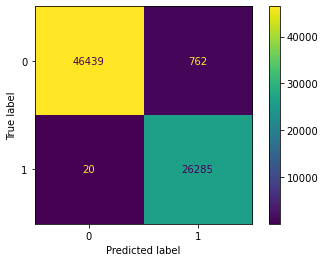

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

base_gbm = GradientBoostingClassifier()
base_gbm.fit(X_train, y_train.values.ravel())

base_gbm_pred = base_gbm.predict(X_test)

score_model(base_gbm, base_gbm_pred)

### 3a. Hyperparameter Tuning for Gradient Boosting Classifier

In [16]:
params = {'learning_rate': np.arange(0.05,0.2,0.05),
          'n_estimators': np.arange(20,81,10)}

gbm = GradientBoostingClassifier()

gbm_cv, gbm_cv_pred = tune_model(gbm, params)

Optimal hyperparameters: {'n_estimators': 80, 'learning_rate': 0.2}


Hyperparameter Tuned Gradient Boosting Classifier
Accuracy: 0.9923
Balanced Accuracy: 0.9938
Precision score for yes: 0.9795
Recall score for yes: 0.9993
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     47201
           1       0.98      1.00      0.99     26305

    accuracy                           0.99     73506
   macro avg       0.99      0.99      0.99     73506
weighted avg       0.99      0.99      0.99     73506



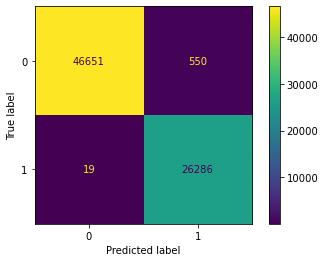

In [17]:
print('Hyperparameter Tuned Gradient Boosting Classifier')
score_model(gbm_cv, gbm_cv_pred)

Tuning the hyperparameters of the Gradient Boosting Machine classifier resulted in only a slight improvement of its predicting power. There are still as many incorrectly predicted 0 labels but was able to correctly predict all projects that have met their goal. However, even with the tuned hyperparameters, the Gradient Boosting classifier still makes significantly more false positive errors than the baseline decision tree model. Because this project aims to minimize the amount of unhappy users donating to a project that subsequently fails to meet its goal, it is crucial that the final model minimizes the amount of false positive errors.

### 4. K-Nearest Neighbors Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,11):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train.values.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

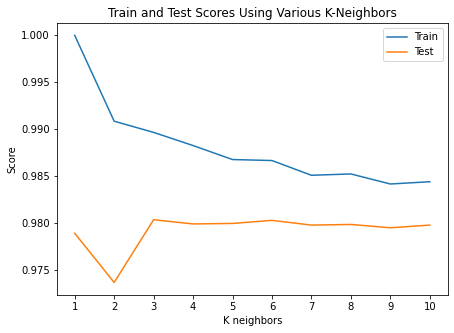

In [19]:
plt.figure(figsize = (7,5))
plt.plot(range(1,11), train_scores, label = 'Train')
plt.plot(range(1,11), test_scores, label = 'Test')
plt.xticks(range(1,11))
plt.xlabel('K neighbors')
plt.ylabel('Score')
plt.title('Train and Test Scores Using Various K-Neighbors')
plt.legend()
plt.show()

K-Nearest Neighbors Classifier
Accuracy: 0.9804
Balanced Accuracy: 0.9813
Precision score for yes: 0.9615
Recall score for yes: 0.9846
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     47201
           1       0.96      0.98      0.97     26305

    accuracy                           0.98     73506
   macro avg       0.98      0.98      0.98     73506
weighted avg       0.98      0.98      0.98     73506



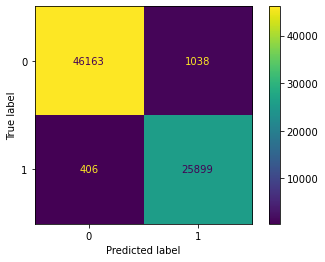

In [20]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train.values.ravel())

knn_pred = knn.predict(X_test)

print('K-Nearest Neighbors Classifier')
score_model(knn, knn_pred)

At a $K$ value of 3, the imporvement on training set score decreased and so $K=3$ was used to predict outcomes on the test set. Although the model objectively did well, the previous models have performed far better than the K-Nearest Neighbors classifier. 

### 5. ROC Curve

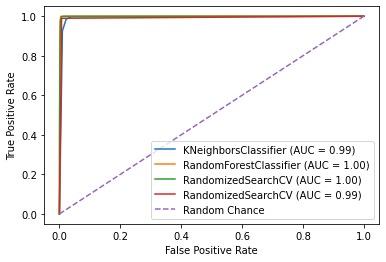

In [21]:
ax = plt.gca()
knn_roc = metrics.plot_roc_curve(knn, X_test, y_test, ax = ax)
forest_roc = metrics.plot_roc_curve(base_forest, X_test, y_test, ax = ax)
gbm_roc = metrics.plot_roc_curve(gbm_cv, X_test, y_test, ax = ax)
tree_roc = metrics.plot_roc_curve(tree_cv, X_test, y_test, ax = ax)
plt.plot([0,1], [0,1], linestyle = '--', label = 'Random Chance')
plt.legend()
plt.show()

From the tests done above, the final model chosen to predict whether a Kickstarter project will meet it's goal by the deadline will be the baseline Decision Tree model. Although it is technically the simplest model, the Decision Tree classifier outperformed the other models in both overall prediction accuracy and, most importantly, minimizing the precision score. Minimizing precision score will allow Kickstarter users to more confidently donate their money to the projects that are more likely be successfully funded and not have to worry about their donations going to a fruite